<a href="https://colab.research.google.com/github/Gabriele90/Biohacker90/blob/main/Linear_regression_solubility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**

Linear regression is used when there is linear relationship between input variables and output variables. That means we can calculate the values of output variables by using some kind of linear combination of input variables. 

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Loading Delaney descriptor dataset

In [ ]:
raw_data = pd.read_csv('delaney_solubility_with_descriptors.csv')

Understanding the Data Set

In [ ]:
raw_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB


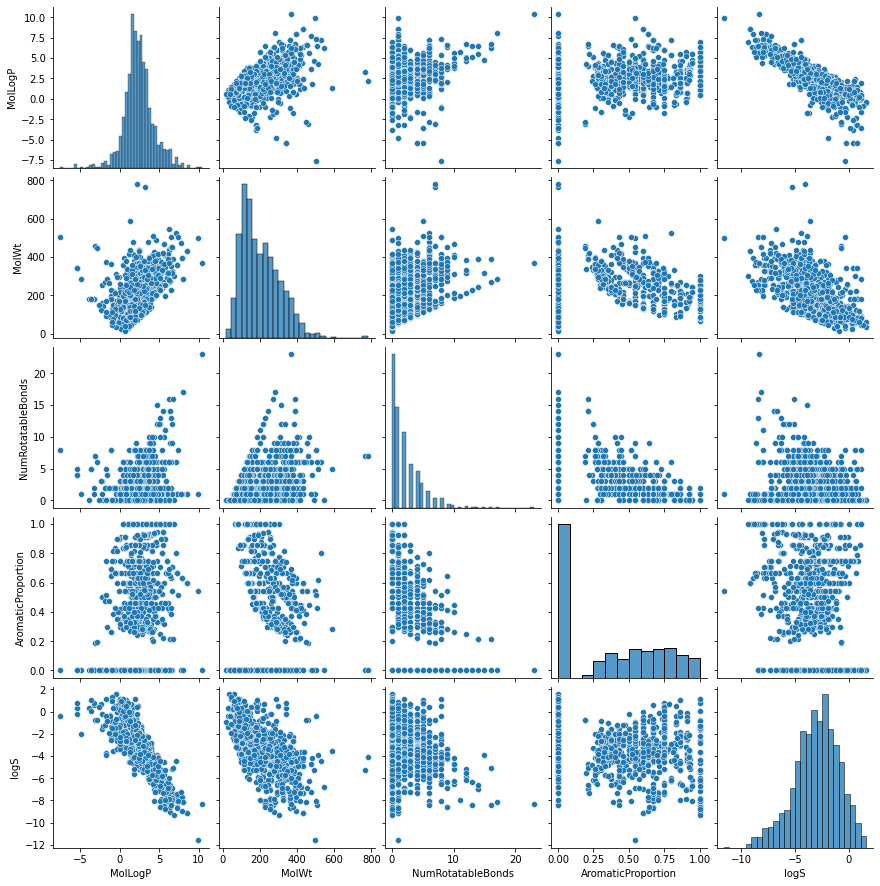

In [ ]:
sns.pairplot(raw_data)

**Building a Machine Learning Linear Regression Model**

The first thing we need to do is split our data into an x-array (which contains the data that we will use to make predictions) and a y-array (which contains the data that we are trying to predict.

First, we should decide which columns to include. You can generate a list of the DataFrame’s columns using raw_data.columns, which outputs:

In [ ]:
raw_data.columns

Index(['MolLogP', 'MolWt', 'NumRotatableBonds', 'AromaticProportion', 'logS'], dtype='object')

We will be using all of these variables in the x-array except for LogS(since that’s the variable we’re trying to predict) and eventual text feature (here there aren't).

Let’s create our x-array and assign it to a variable called x.

In [ ]:
x = raw_data[['MolLogP', 'MolWt', 'NumRotatableBonds', 'AromaticProportion']]

Next, let’s create our y-array and assign it to a variable called y

In [ ]:
y = raw_data['logS']

We have successfully divided our data set into an x-array (which are the input values of our model) and a y-array (which are the output values of our model). We’lll learn how to split our data set further into training data and test data in the next section.

**Splitting our Data Set into Training Data and Test Data**

scikit-learn makes it very easy to divide our data set into training data and test data. To do this, we’ll need to import the function train_test_split from the model_selection module of scikit-learn.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

**Building and Training the Model**

The first thing we need to do is import the LinearRegression estimator from scikit-learn.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Our model has now been trained. You can examine each of the model’s coefficients using the following statement:

In [ ]:
print(model.coef_)

[-0.72262697 -0.00674116  0.00208645 -0.36095818]


A nicer way to view the coefficients is by placing them in a DataFrame. This can be done with the following statement:

In [ ]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
MolLogP,-0.722627
MolWt,-0.006741
NumRotatableBonds,0.002086
AromaticProportion,-0.360958


**Making Predictions From Our Model**

scikit-learn makes it very easy to make predictions from a machine learning model. You simply need to call the predict method on the model variable that we created earlier.

Since the predict variable is designed to make predictions, it only accepts an x-array parameter. It will generate the y values for you!

Here is the code you’ll need to generate predictions from our model using the predict method:



In [ ]:
predictions = model.predict(x_test)

The predictions variable holds the predicted values of the features stored in x_test. Since we used the train_test_split method to store the real values in y_test, what we want to do next is compare the values of the predictions array with the values of y_test.

An easy way to do this is plot the two arrays using a scatterplot. It’s easy to build matplotlib scatterplots using the plt.scatter method. 

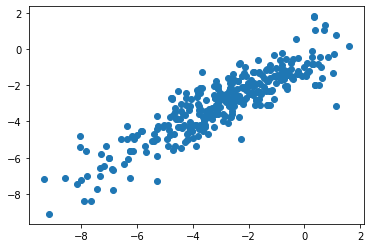

In [ ]:
plt.scatter(y_test, predictions)

As you can see, our predicted values are very close to the actual values for the observations in the data set. A perfectly straight diagonal line in this scatterplot would indicate that our model perfectly predicted the y-array values.

Another way to visually assess the performance of our model is to plot its residuals, which are the difference between the actual y-array values and the predicted y-array values.

An easy way to do this is with the following statement:

(array([  2.,  10.,  39.,  73., 118.,  73.,  22.,   6.,   0.,   1.]),
 array([-3.26192762, -2.5063447 , -1.75076177, -0.99517885, -0.23959592,
         0.515987  ,  1.27156992,  2.02715285,  2.78273577,  3.53831869,
         4.29390162]),
 <a list of 10 Patch objects>)

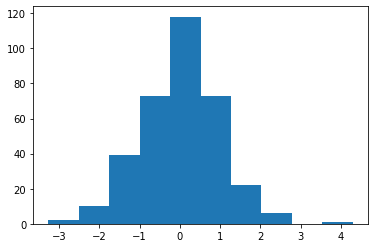

In [ ]:
plt.hist(y_test - predictions)

This is a histogram of the residuals from our machine learning model.

You may notice that the residuals from our machine learning model appear to be normally distributed. This is a very good sign!

It indicates that we have selected an appropriate model type (in this case, linear regression) to make predictions from our data set. We will learn more about how to make sure you’re using the right model later in this course.

**Testing the Performance of our Model**

We learned near the beginning of this course that there are three main performance metrics used for regression machine learning models:

Mean absolute error

Mean squared error

Root mean squared error

We will now see how to calculate each of these metrics for the model we’ve built in this tutorial. 

In [ ]:
from sklearn import metrics

**Mean Absolute Error (MAE)**

In [ ]:
metrics.mean_absolute_error(y_test, predictions)

0.7602912638470081

**Mean Squared Error (MSE)**

In [ ]:
metrics.mean_squared_error(y_test, predictions)

0.9504204069155194

**Root Mean Squared Error (RMSE)**

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.9748950748237061